In [68]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc

In [30]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
data = df.copy()

In [32]:
data.drop(['PassengerId', 'Pclass', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [33]:
all(data['Embarked'].isna())

False

In [34]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [35]:
data['Embarked'] = data['Embarked'].fillna('S')

In [36]:
mean_age = np.round(data['Age'].mean())

data['Age'] = data['Age'].fillna(mean_age)

In [37]:
data['Sex'] = np.where(data['Sex'] == 'male', 1, 0)

In [38]:
data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [39]:
def transpose(value):
    if value == 'S':
        return 0
    elif value == 'Q':
        return 1
    elif value == 'C':
        return 2
    
    
trans = np.vectorize(transpose)

new = trans(data['Embarked'])

In [40]:
data.drop(['Embarked'],axis=1, inplace=True)

In [41]:
data['Embarked'] = new

In [42]:
Data = data.copy()

In [44]:
Data.to_csv('Final_train.csv')

---------------------------

In [55]:
data = pd.read_csv('Final_train.csv')
data.head()

,Unnamed: 0,Survived,Sex,Age,Fare,Embarked
0,0,0,1,22.0,7.2500,0
1,1,1,0,38.0,71.2833,2
2,2,1,0,26.0,7.9250,0
3,3,1,0,35.0,53.1000,0
4,4,0,1,35.0,8.0500,0


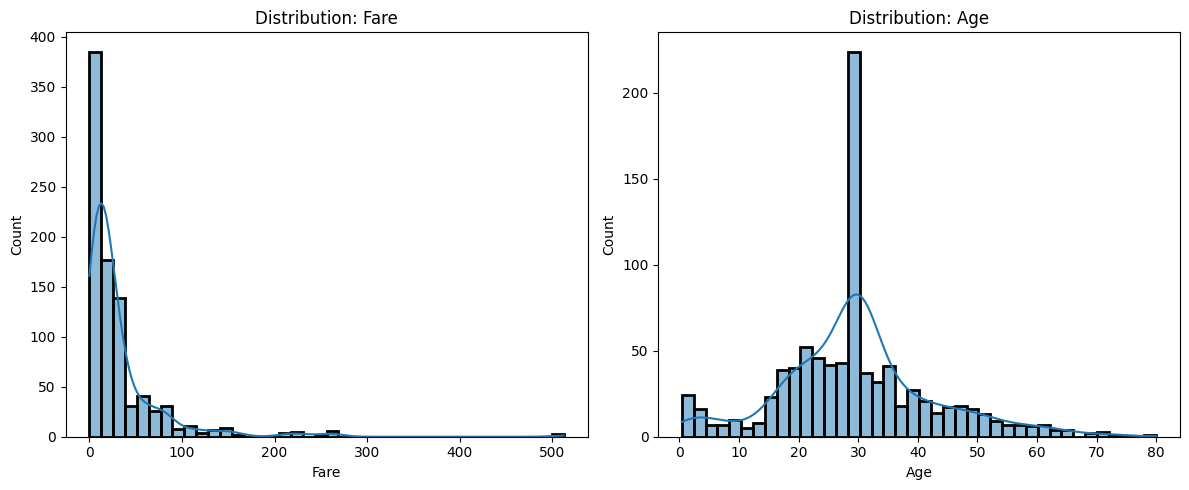

In [56]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 строка, 2 столбца


sns.histplot(data['Fare'], bins=40, kde=True, linewidth=2, ax=axes[0])
axes[0].set_title("Distribution: Fare")


sns.histplot(data['Age'], bins=40, kde=True, linewidth=2, ax=axes[1])
axes[1].set_title("Distribution: Age")

plt.tight_layout()  # Улучшает размещение графиков
plt.show()

In [71]:
############ shapiro test
from typing import Union


def Shapiro_visual(data: Union[pd.DataFrame, pd.Series, np.array, list[int]]) -> None:
    
    if len(data.shape) > 1:
    
        col_names = data.columns
        n_sampels, n_feature = data.shape
            
        for i in range(n_feature):
            columns_data = data.iloc[::, i]
            
            s, p = sc.stats.shapiro(columns_data)
            s_0, p_0 = sc.stats.normaltest(columns_data)
            
            print(f' Shapiro - test        | Feature name -> {col_names[i]} | stat: {s:.3f}, p_value: {p:.3f}')
            print(f' D"Agostino K^2 - test | Feature name -> {col_names[i]} | stat: {s_0:.3f}, p_value: {p_0:.3f}')
            
            if p > 0.05:
                print('Shapiro test:  The data is normally distributed')
            else:
                print('Shapiro test: the data is not normally distributed')
        
            if p_0 > 0.05:
                print('D"Agostino K^2 test:  The data is normally distributed')
            else:
                print('D"Agostino K^2 test: the data is not normally distributed')
                                
            sc.stats.probplot(columns_data, dist='norm', plot=plt)
            plt.show()
            
    else:
        col_name = data.name
        s, p = sc.stats.shapiro(data)
        s_0, p_0 = sc.stats.normaltest(data)
        print(f' Shapiro test        | Feature name -> {col_name} | stat: {s:.3f} | p_value {p:.3f}')
        print(f' D"Agostino K^2 test | Feature name -> {col_name} | stat: {s_0:.3f}, p_value: {p_0:.3f}')
        
        if p > 0.05:
            print('Shapiro test:  The data is normally distributed')
        else:
            print('Shapiro test: the data is not normally distributed')
            
        if p_0 > 0.05:
            print('D"Agostino K^2 test:  The data is normally distributed')
        else:
            print('D"Agostino K^2 test: the data is not normally distributed')
                        
        sc.stats.probplot(data, dist='norm', plot=plt)
        plt.show()

 Shapiro - test        | Feature name -> Age | stat: 0.959, p_value: 0.000
 D"Agostino K^2 - test | Feature name -> Age | stat: 42.117, p_value: 0.000
Shapiro test: the data is not normally distributed
D"Agostino K^2 test: the data is not normally distributed


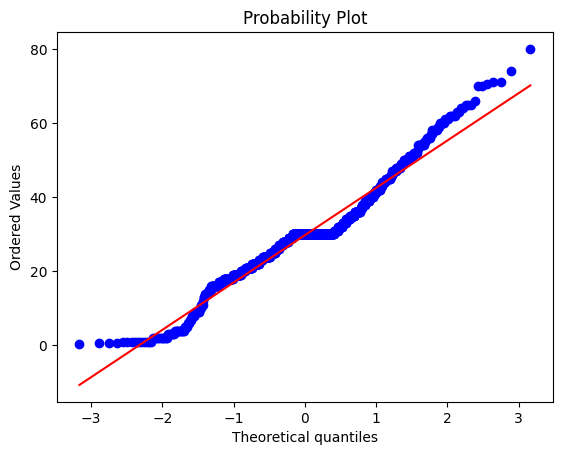

 Shapiro - test        | Feature name -> Fare | stat: 0.522, p_value: 0.000
 D"Agostino K^2 - test | Feature name -> Fare | stat: 904.587, p_value: 0.000
Shapiro test: the data is not normally distributed
D"Agostino K^2 test: the data is not normally distributed


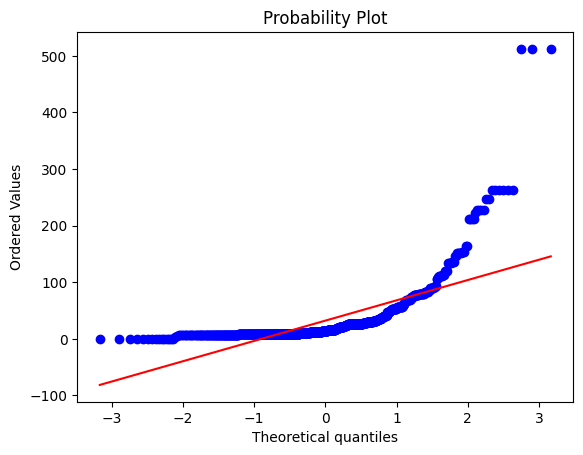

In [72]:
Shapiro_visual(data.loc[::, ['Age', 'Fare']])

In [73]:
def Anderson_distributed_test(x):
    
    test_anderson = sc.stats.anderson(x)

    for i in range(len(test_anderson.critical_values)):
    
        s_l = test_anderson.significance_level[i]
        c_v = test_anderson.critical_values[i]
    
        if test_anderson.statistic < c_v:
            print(f'Gaussian at the level {s_l}')
        else:
            print(f'Not Gaussian at the level {s_l}')

In [74]:
Anderson_distributed_test(data['Age'])

Not Gaussian at the level 15.0
Not Gaussian at the level 10.0
Not Gaussian at the level 5.0
Not Gaussian at the level 2.5
Not Gaussian at the level 1.0


In [77]:
Anderson_distributed_test(data['Fare'])

Not Gaussian at the level 15.0
Not Gaussian at the level 10.0
Not Gaussian at the level 5.0
Not Gaussian at the level 2.5
Not Gaussian at the level 1.0


-----------------

In [1]:
import pandas as pd

pd.read_csv('Final_train.csv')

,Unnamed: 0,Survived,Sex,Age,Fare,Embarked
0,0,0,1,22.0,7.2500,0
1,1,1,0,38.0,71.2833,2
2,2,1,0,26.0,7.9250,0
3,3,1,0,35.0,53.1000,0
4,4,0,1,35.0,8.0500,0
...,...,...,...,...,...,...
886,886,0,1,27.0,13.0000,0
887,887,1,0,19.0,30.0000,0
888,888,0,0,30.0,23.4500,0
889,889,1,1,26.0,30.0000,2
